# Skull Stripping

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install tensorflow version
!pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.6 kB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
     |████████████████████████████████| 3.8 MB 35.9 MB/s 
     |████████████████████████████████| 2.9 MB 33.4 MB/s 
     |████████████████████████████████| 503 kB 55.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7e7545f284c57468dfd3c77b6f7f983ede3d4be506f4075add5f8a200fc2a285
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [ ]:
#Install Deepbrain library
!pip install deepbrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 677 kB 7.7 MB/s 


In [ ]:
#Import Libraries
import nibabel as nib
from deepbrain import Extractor
import matplotlib.pyplot as plt
import os
import cv2
from skimage import color

In [ ]:
#import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


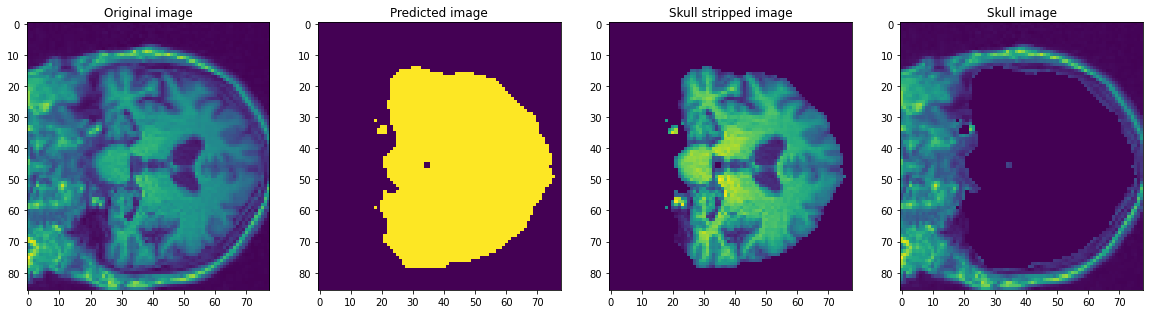

In [ ]:
#Load 3D MRI image and get array
img = nib.load("/content/drive/MyDrive/MSc Project Datasets/3D_MRI_Images/Preprocessed_3D_MRI_images/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I173974.nii").get_fdata()

#Initialize extractor
ext = Extractor()

#3d numpy image containing probability of being brain tissue
prob = ext.run(img) 

#Middle Coronal Slicing
img1x = img[:,55,:]

#Mask
mask = prob > 0.5
#Predicted image
img2x = mask[:,55,:]
#Skull stripping by overlaying mask on original image 
br_img = mask * img
#Skull stripped image
img3x = br_img[:,55,:]
#Skull tissue
skull_img = img - br_img
#Skull tissue image
img4x = skull_img[:,55,:]

#Plot images

fig,ax=plt.subplots(1,4,figsize=(20,10))
ax[0].set_title('Original image')
ax[0].imshow(img1x)
ax[1].set_title('Predicted image')
ax[1].imshow(img2x)
ax[2].set_title('Skull stripped image')
ax[2].imshow(img3x)
ax[3].set_title('Skull image')
ax[3].imshow(img4x)





(86, 78) uint8
(86, 78, 3)


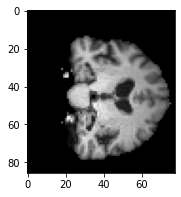

In [ ]:
from skimage import color
import cv2

#Rescale the image 0-255
norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print(norm.shape, norm.dtype)

#Add 3 channels to image
norms = color.gray2rgb(norm)

print(norms.shape)

#Plot final image
plt.figure(figsize=(3, 3))
plt.imshow(norms)


plt.show()

# 2D Image Slicing

In [ ]:
def baselineslices(srcpath,destpath):
  """ Using non-preprocessed images create 3 middle axial,sagital,cornal axis slices
    Args:
        srcpath: source directory path
        destpath: destination directory path
    """

  #Loop through source image directory
  for (root,dirs,files) in os.walk(srcpath, topdown=True):
      for file in files:
          #Source image directory path
          niiimage = os.path.join(root,file)
          #Obtain File name
          filename = file.split(".")[:-1][0]
          #Destination direcory path
          finaldest = os.path.join(destpath,filename)
          #Load non preprocessed  3D MRI image and get array
          img = nib.load(niiimage).get_fdata()

          #Middle Axial slicing
          img3x = img[:,:,128]
          #Rescale the axial image 0-255
          norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
          #Add 3 channels to axial image
          norms = color.gray2rgb(norm)
          #Save Middle Axial slice in destination
          cv2.imwrite(f"{finaldest}1.jpg", norms)

          #Middle Sagittal slicing
          img3x = img[80,:,:]
          #Rescale the sagittal image 0-255
          norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
          #Add 3 channels to sagittal image
          norms = color.gray2rgb(norm)
          #Save Middle saggital slice in destination
          cv2.imwrite(f"{finaldest}2.jpg", norms)

          #Middle Coronal slicing
          img3x = img[:,120,:]
          #Rescale the coronal image 0-255
          norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
          #Add 3 channels to coronal image
          norms = color.gray2rgb(norm)
          #Save Middle coronal slice in destination
          cv2.imwrite(f"{finaldest}3.jpg", norms)

In [ ]:
baselineslices("/content/drive/MyDrive/MSc Project Datasets/3D_MRI_Images/Raw_3D_MRI_images_without_preprocessing/Train/AD","/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Baseline_2D_non_preprocessed_MRI/Train/AD")

Populating the interactive namespace from numpy and matplotlib


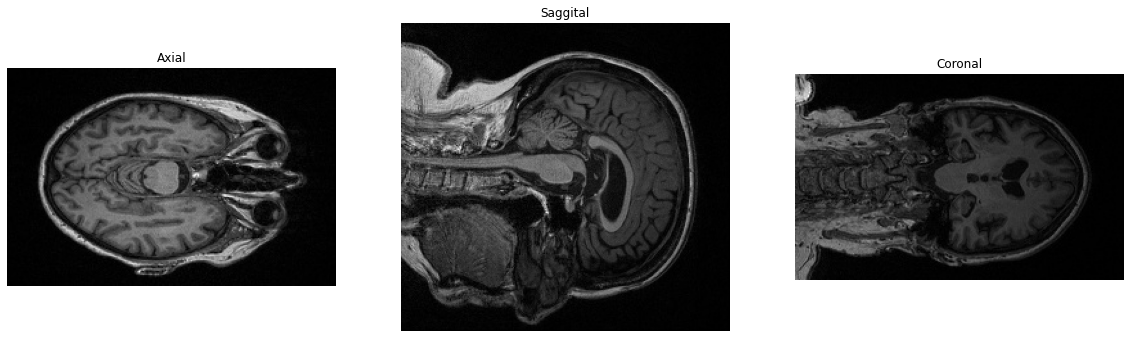

In [ ]:
# Visualize Basekine MRI images without any preprocessing from 3 axis of axial, sagittal and Coronal
import matplotlib.image as mpimg
%pylab inline
import matplotlib.pyplot as plt

imagelabels = ['/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Baseline_2D_non_preprocessed_MRI/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I1739741.jpg',
               "/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Baseline_2D_non_preprocessed_MRI/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I1739742.jpg",
              "/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Baseline_2D_non_preprocessed_MRI/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I1739743.jpg"]
labels = ["Axial","Saggital","Coronal"]

plt.figure(figsize=(20,20))
for i in range(len(imagelabels)):
    img = mpimg.imread(imagelabels[i])
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

In [ ]:
def coronal_skullstrip_slices(srcpath,destpath,startindex,endindex):
   """ Creating 2D skullstripped coronal slices
    Args:
        srcpath: source directory path
        destpath: destination directory path
        startindex: Starting slice index number
        endindex: Ending slice index number
    """
  #Loop through source image directory
  for (root,dirs,files) in os.walk(srcpath, topdown=True):
      for file in files:
          #Source image directory path
          niiimage = os.path.join(root,file)
          #Obtain File Name
          filename = file.split(".")[:-1][0]
          #Destination direcory oath
          finaldest = os.path.join(destpath,filename)

          #Load 3D MRI image and get array
          img = nib.load(niiimage).get_fdata()
          #Initialize extractor
          ext = Extractor()
          #3d numpy image containing probability of being brain tissue
          prob = ext.run(img)
          #Loop through images from starting slice number and ending slice number
          for i in range(startindex,endindex):
            #Generate 3D Mask
            mask = prob > 0.5
            #Skull stripping by overlaying mask on image
            br_img = mask * img
            #Coronal Slicing basen on index
            img3x = br_img[:,i,:]
            #Rescale the coronal image 0-255
            norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            #Add 3 channels to coronal image
            norms = color.gray2rgb(norm)
            #Save coronal slice in destination
            cv2.imwrite(f"{finaldest}{i}.jpg", norms)


In [ ]:
coronal_skullstrip_slices("/content/drive/MyDrive/MSc Project Datasets/3D_MRI_Images/Preprocessed_3D_MRI_images/Train/AD","/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Skullstripped_Registered_5slice_Coronal/Train/AD",53,58)

In [ ]:
def axial_skullstrip_slices(srcpath,destpath,startindex,endindex):
  """ Creating 2D skullstripped Axial slices
    Args:
        srcpath: source directory path
        destpath: destination directory path
        startindex: Starting slice index number
        endindex: Ending slice index number
    """
  #Loop through source image directory
  for (root,dirs,files) in os.walk(srcpath, topdown=True):
      for file in files:
          #Source image directory path
          niiimage = os.path.join(root,file)
          #Obtain File Name
          filename = file.split(".")[:-1][0]
          #Destination direcory oath
          finaldest = os.path.join(destpath,filename)

          #Load 3D MRI image and get array
          img = nib.load(niiimage).get_fdata()
          #Initialize extractor
          ext = Extractor()
          #3d numpy image containing probability of being brain tissue
          prob = ext.run(img)
          #Loop through images from starting slice number and ending slice number
          for i in range(startindex,endindex):
            #Generate 3D Mask
            mask = prob > 0.5
            #Skull stripping by overlaying mask on image
            br_img = mask * img
            #Axial Slicing based on index
            img3x = br_img[:,:,i]
            #Rescale the Axial image 0-255
            norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            #Add 3 channels to Axial image
            norms = color.gray2rgb(norm)
            #Save Axial slice in destination
            cv2.imwrite(f"{finaldest}{i}.jpg", norms)


In [ ]:
axial_skullstrip_slices("/content/drive/MyDrive/MSc Project Datasets/3D_MRI_Images/Preprocessed_3D_MRI_images/Train/AD","/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Skullstripped_Registered_5slice_Axial/Train/AD",37,42)

In [ ]:
def no_skullstrip_slices(axis,srcpath,destpath,startindex,endindex):
  """ Creating non skullstripped Axial or Coronal slices
    Args:
        axis: Axial or Coronal axis
        srcpath: source directory path
        destpath: destination directory path
        startindex: Starting slice index number
        endindex: Ending slice index number
    """
  #Non skullstripped axial slicing
  if axis == "axial":
    for (root,dirs,files) in os.walk(srcpath, topdown=True):
        for file in files:
            #Source image directory path
            niiimage = os.path.join(root,file)
            #Obtain File Name
            filename = file.split(".")[:-1][0]
            #Destination direcory oath
            finaldest = os.path.join(destpath,filename)
            #Load 3D MRI image and get array
            img = nib.load(niiimage).get_fdata()
            #Loop through images from starting slice number and ending slice number
            for i in range(startindex,endindex):
              #Axial slicing based on index
              img3x = img[:,:,i]
              #Rescale the Axial image 0-255
              norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
              #Add 3 channels to Axial image
              norms = color.gray2rgb(norm)
              #Save Axial slice in destination
              cv2.imwrite(f"{finaldest}{i}.jpg", norms)

  #Non skull stripped coronal slicing           
  elif axis == "coronal":
    for (root,dirs,files) in os.walk(srcpath, topdown=True):
        for file in files:
            #Source image directory path
            niiimage = os.path.join(root,file)
            #Obtain File Name
            filename = file.split(".")[:-1][0]
            #Destination direcory oath
            finaldest = os.path.join(destpath,filename)
            #Load 3D MRI image and get array
            img = nib.load(niiimage).get_fdata()
            #Loop through images from starting slice number and ending slice number
            for i in range(startindex,endindex):
              #Coronal slicing based on index
              img3x = img[:,i,:]
              #Rescale the Coronal image 0-255
              norm = cv2.normalize(img3x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
              #Add 3 channels to Coronal image
              norms = color.gray2rgb(norm)
              #Save Coronal slice in destination
              cv2.imwrite(f"{finaldest}{i}.jpg", norms)


In [ ]:
no_skullstrip_slices("axial","/content/drive/MyDrive/Dataset/Train/AD","/content/drive/MyDrive/noskullstrip5/Train/AD",37,42)

Populating the interactive namespace from numpy and matplotlib


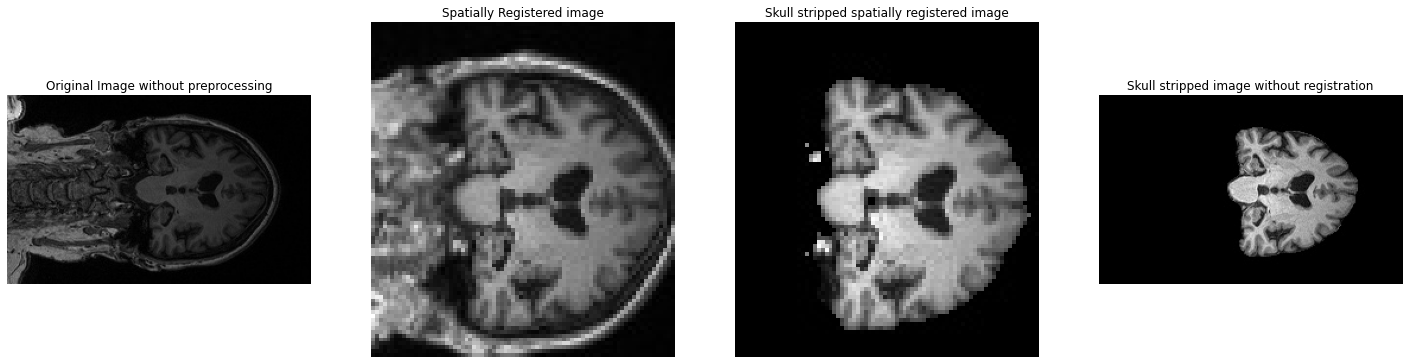

In [ ]:
# Visualize Coronal MRI image with different preprocessing techniques
import matplotlib.image as mpimg
%pylab inline
import matplotlib.pyplot as plt

imagelabels = ["/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Baseline_2D_non_preprocessed_MRI/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I1739743.jpg",
               "/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Non_Skullstripped_Registered_5slice_Coronal/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I17397455.jpg",
               "/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Skullstripped_Registered_5slice_Coronal/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I17397455.jpg",
               "/content/drive/MyDrive/MSc Project Datasets/2D_MRI_Images/Skullstripped_Non_Registered_5slice_Coronal/Train/AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I173974121.jpg"]
labels = ["Original Image without preprocessing","Spatially Registered Coronal image","Skull stripped spatially registered image","Skull stripped image without registration"]

plt.figure(figsize=(25,25))
for i in range(len(imagelabels)):
    img = mpimg.imread(imagelabels[i])
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")